In [1]:
import os
import json
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from itertools import combinations

In [66]:
#phase_dir = '../phased_spark'
#assembly = '38'

#sample_to_age = dict()
#with open('../phenotypes/basic_medical_screening.csv', 'r') as f:
#    next(f) # skip header
#    for line in f:
#        pieces = line.strip().split(',')
#        sample_to_age[pieces[0]] = int(pieces[8])
        

#phase_dir = '../phased_ihart'
#assembly = '37'

phase_dirs = ['../phased_ssc.hg38', '../phased_mssng_quads', '../phased_ihart.ms2_quads']
#phase_dirs = ['../phased_ihart.ms2_quads']
#phase_dirs = ['../phased_mssng_quads']
assembly = '38'

In [69]:
def pull_crossovers(phase_dir):
    child_to_crossovers = defaultdict(list)
    print(phase_dir)
    for file in sorted(os.listdir(phase_dir)):
        if file.endswith('.gene_conversions.json'):
            with open('%s/%s' % (phase_dir, file), 'r') as f:
                cos = json.load(f)
                if len(cos)<250:
                    for co in cos:
                        child_to_crossovers[tuple(co['child'])].append(co)
                else:
                    print('Are they related?', file)
    print(len(child_to_crossovers))
    return child_to_crossovers
            
crossovers = [pull_crossovers(phase_dir) for phase_dir in phase_dirs]

../phased_ssc.hg38
Are they related? 12970.gene_conversions.json
Are they related? 13949.gene_conversions.json
Are they related? 13976.gene_conversions.json
Are they related? 14357.gene_conversions.json
Are they related? 14655.gene_conversions.json
1921
../phased_mssng_quads
736
../phased_ihart.ms2_quads
Are they related? AU0832.AU083203.AU083204.gene_conversions.json
Are they related? AU0866.AU0866301.AU0866302.gene_conversions.json
Are they related? AU0905.AU0905301.AU0905302.gene_conversions.json
Are they related? AU0905.AU0905301.AU0905303.gene_conversions.json
Are they related? AU0923.AU0923301.AU0923302.gene_conversions.json
Are they related? AU0941.AU0941301.AU0941302.gene_conversions.json
Are they related? AU0951.AU0951301.AU0951302.gene_conversions.json
1984


In [72]:
def pull_nco_lens(child_to_crossovers):
    nco_lens_mat, nco_lens_pat = [], []
    already_included = set()
    for child, ncos in child_to_crossovers.items():
        if child[0] not in already_included and child[1] not in already_included:
            for co in ncos:
                #length = np.mean(co['recombinations'][-1][2:4])-np.mean(co['recombinations'][0][2:4])
                length = co['recombinations'][-1][2]-co['recombinations'][0][3]
                if co['is_mat']:
                    nco_lens_mat.append(length)
                if co['is_pat']:
                    nco_lens_pat.append(length)
    return np.array(nco_lens_mat), np.array(nco_lens_pat)
                
nco_lens = [pull_nco_lens(c) for c in crossovers]


//anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log10
//anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in log10
//anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
//anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to 

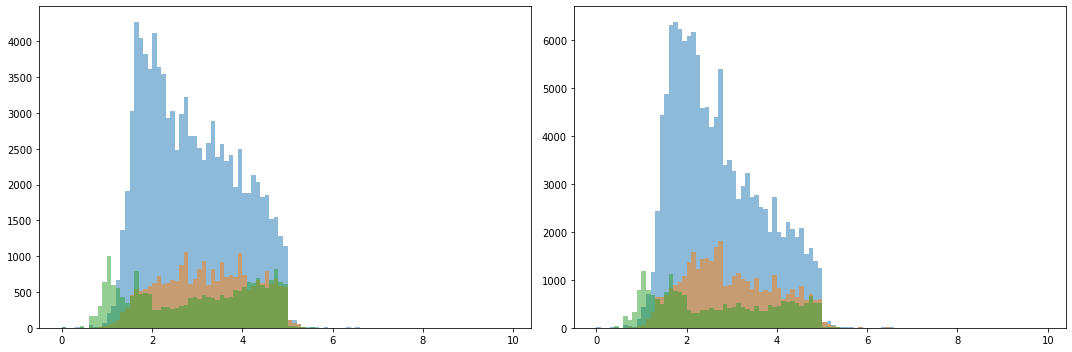

In [73]:
bins=np.arange(0, 10, 0.1)

plt.figure(figsize=(15, 5))

for nco_lens_mat, nco_lens_pat in nco_lens:
    plt.subplot(1, 2, 1)
    plt.hist(np.log10(nco_lens_mat), alpha=0.5, bins=bins, label='mat')
    plt.subplot(1, 2, 2)
    plt.hist(np.log10(nco_lens_pat), alpha=0.5, bins=bins, label='pat')

plt.tight_layout()
plt.show()

In [53]:
child_to_affected = dict()
with open('../../DATA/ihart.ms2/ihart.ped.quads.ped', 'r') as f:
    for line in f:
        pieces = line.strip().split('\t')
        child_to_affected[pieces[1]] = pieces[5]

In [54]:
nco_lens_mat, nco_lens_pat = [], []
already_included = set()
for child, ncos in child_to_crossovers.items():
    if child[0] not in already_included and child[1] not in already_included:
        

SyntaxError: unexpected EOF while parsing (<ipython-input-54-d4c59ffae753>, line 5)